In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [ ]:
# Read Data
data = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/income.csv"

df = pd.read_csv(data)
df.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8993 non-null   object
 1   SEX             8993 non-null   object
 2   MARITAL.STATUS  8833 non-null   object
 3   AGE             8993 non-null   object
 4   EDUCATION       8907 non-null   object
 5   OCCUPATION      8857 non-null   object
 6   AREA            8080 non-null   object
 7   DUAL.INCOMES    8993 non-null   object
 8   HOUSEHOLD.SIZE  8618 non-null   object
 9   UNDER18         3269 non-null   object
 10  HOUSEHOLDER     8753 non-null   object
 11  HOME.TYPE       8636 non-null   object
 12  ETHNIC.CLASS    8925 non-null   object
 13  LANGUAGE        8634 non-null   object
dtypes: object(14)
memory usage: 983.7+ KB


In [ ]:
df.describe()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
count,8993,8993,8833,8993,8907,8857,8080,8993,8618,3269,8753,8636,8925,8634
unique,9,2,5,7,6,9,5,3,9,9,3,5,8,3
top,-10.000),F,Single,25-34,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Two,One,Rent,House,White,English
freq,1745,4918,3654,2249,3066,2820,5182,5438,2664,1506,3670,5073,5811,7794


In [ ]:
df.isnull().sum()

,0
INCOME,0
SEX,0
MARITAL.STATUS,160
AGE,0
EDUCATION,86
OCCUPATION,136
AREA,913
DUAL.INCOMES,0
HOUSEHOLD.SIZE,375
UNDER18,5724


In [ ]:
# Cleaning data

df = df.dropna(subset=['MARITAL.STATUS','EDUCATION','OCCUPATION','AREA','HOUSEHOLD.SIZE', 'HOUSEHOLDER', 'HOME.TYPE','ETHNIC.CLASS','LANGUAGE'])

df.drop(columns=['UNDER18'], inplace=True)

df_rIndex = df.reset_index()
df_rIndex.drop(columns = ['index'], inplace = True)
df_rIndex.head()

<ipython-input-48-945d37b6c621>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['UNDER18'], inplace=True)


,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Own,House,White,English
1,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,Rent,Apartment,White,English
2,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Family,House,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Family,House,White,English
4,[50.000-75.000),M,Married,55-64,1 to 3 years of college,Retired,10+ years,No,Two,Own,House,White,English


DESCRIPTIVE ANALYSIS


In [ ]:
# Mapping INCOME to Ordinal Values for descriptive purposes

income_mapping = {
    '-10.000)': 1,
    '[10.000-15.000)': 2,
    '[15.000-20.000)': 3,
    '[20.000-25.000)': 4,
    '[25.000-30.000)': 5,
    '[30.000-40.000)': 6,
    '[40.000-50.000)': 7,
    '[50.000-75.000)': 8,
    '[75.000-': 9
}

df['INCOME_ORDINAL'] = df['INCOME'].map(income_mapping)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 6876 entries, 1 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          6876 non-null   object
 1   SEX             6876 non-null   object
 2   MARITAL.STATUS  6876 non-null   object
 3   AGE             6876 non-null   object
 4   EDUCATION       6876 non-null   object
 5   OCCUPATION      6876 non-null   object
 6   AREA            6876 non-null   object
 7   DUAL.INCOMES    6876 non-null   object
 8   HOUSEHOLD.SIZE  6876 non-null   object
 9   HOUSEHOLDER     6876 non-null   object
 10  HOME.TYPE       6876 non-null   object
 11  ETHNIC.CLASS    6876 non-null   object
 12  LANGUAGE        6876 non-null   object
 13  INCOME_ORDINAL  6876 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 805.8+ KB


,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE,INCOME_ORDINAL
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Own,House,White,English,9
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,Rent,Apartment,White,English,9
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Family,House,White,English,1
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Family,House,White,English,1
5,[50.000-75.000),M,Married,55-64,1 to 3 years of college,Retired,10+ years,No,Two,Own,House,White,English,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,10+ years,Not Married,Three,Family,House,White,English,1
8989,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Four,Family,House,White,English,2
8990,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,10+ years,Not Married,Three,Family,House,White,English,1
8991,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Yes,Three,Rent,Apartment,White,English,4


<ipython-input-50-ca057560a5b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='SEX', y='INCOME_ORDINAL', palette=palette, order=marital_order, width=0.4)


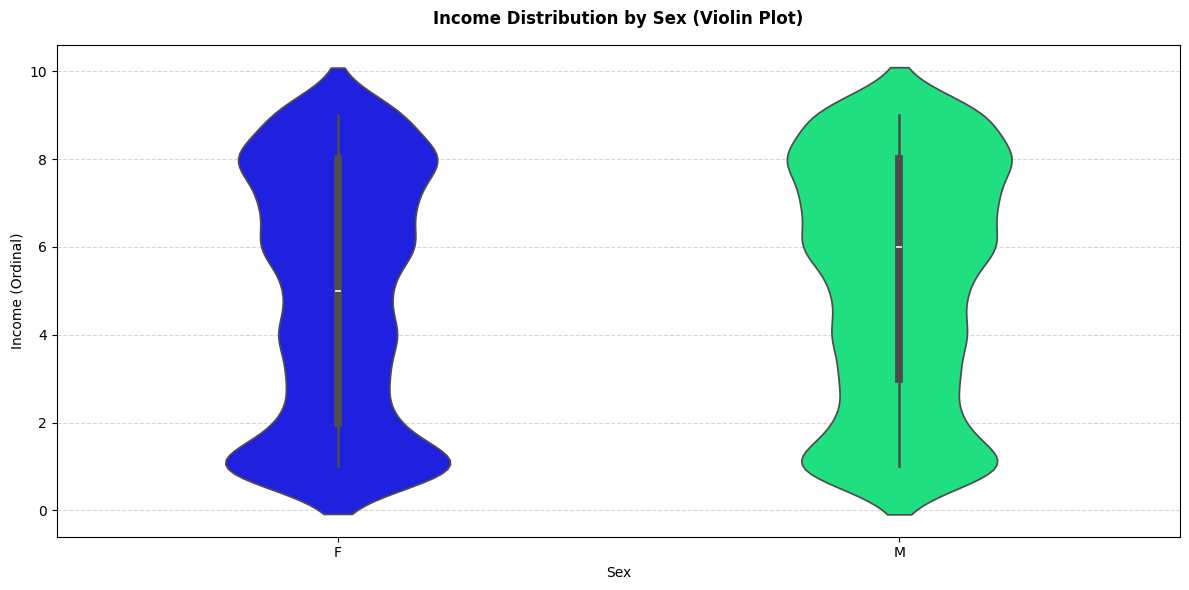

In [ ]:
# Income vs Sex

# Data
marital_order = df.groupby('SEX')['INCOME_ORDINAL'].mean().sort_values().index

# Color
cmap = plt.get_cmap('winter')
marital_statuses = df['SEX'].unique()
colors = cmap(np.linspace(0, 1, len(marital_statuses)))
palette = dict(zip(marital_order, colors))

# Plot
plt.figure(figsize=[12, 6])
sns.violinplot(data=df, x='SEX', y='INCOME_ORDINAL', palette=palette, order=marital_order, width=0.4)
plt.xlabel('Sex')
plt.ylabel('Income (Ordinal)')
plt.title('Income Distribution by Sex (Violin Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-51-53c1663b9ad0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='MARITAL.STATUS', y='INCOME_ORDINAL', palette=palette, order=marital_order, alpha=0.8)


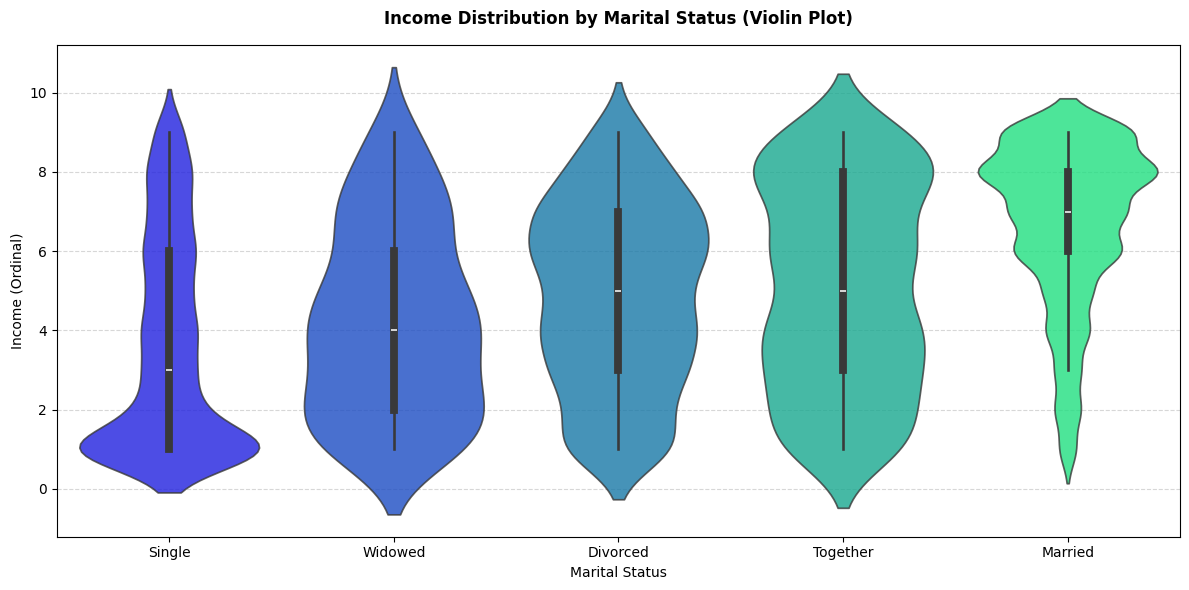

In [ ]:
# Income vs Martial Status

# Data
marital_order = df.groupby('MARITAL.STATUS')['INCOME_ORDINAL'].mean().sort_values().index

# Color
cmap = plt.get_cmap('winter')
marital_statuses = df['MARITAL.STATUS'].unique()
colors = cmap(np.linspace(0, 1, len(marital_statuses)))
palette = dict(zip(marital_order, colors))

# Plot
plt.figure(figsize=[12, 6])
sns.violinplot(data=df, x='MARITAL.STATUS', y='INCOME_ORDINAL', palette=palette, order=marital_order, alpha=0.8)
plt.xlabel('Marital Status')
plt.ylabel('Income (Ordinal)')
plt.title('Income Distribution by Marital Status (Violin Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

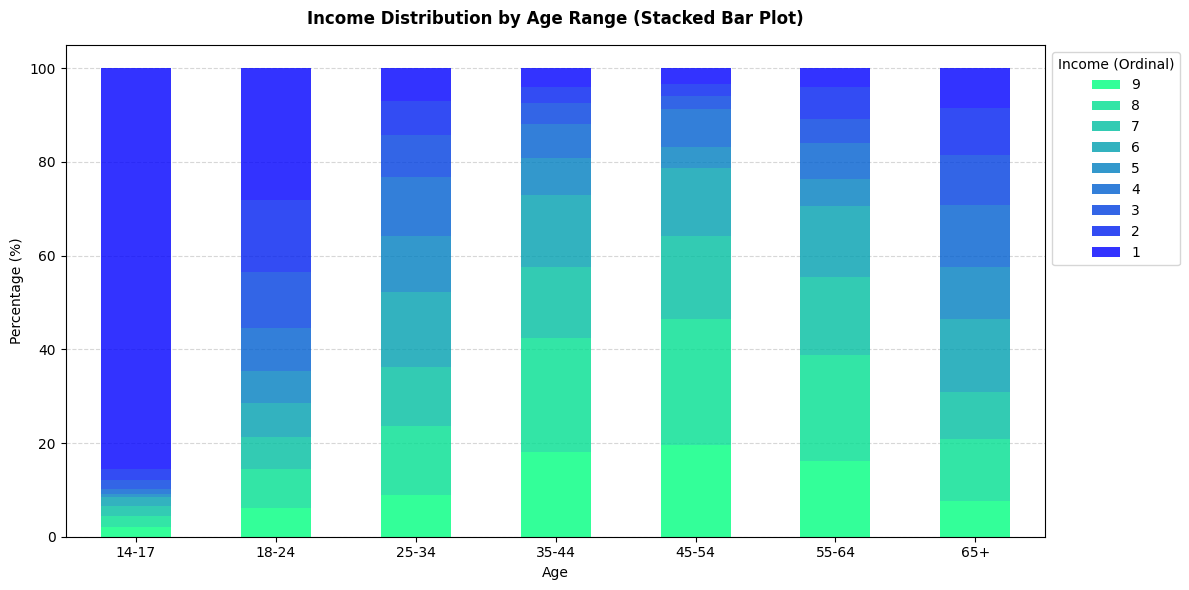

In [ ]:
# Income vs Age

# Data
age_income = df.groupby(['AGE', 'INCOME_ORDINAL']).size().unstack(fill_value=0)
age_income_percentage = age_income.div(age_income.sum(axis=1), axis=0) * 100
age_income_percentage = age_income_percentage[age_income_percentage.columns[::-1]]

# Plot
age_income_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='winter_r', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.title('Income Distribution by Age Range (Stacked Bar Plot)', fontweight='bold', pad=15)
plt.xticks(rotation=0)
plt.legend(title='Income (Ordinal)', bbox_to_anchor=(1.0, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

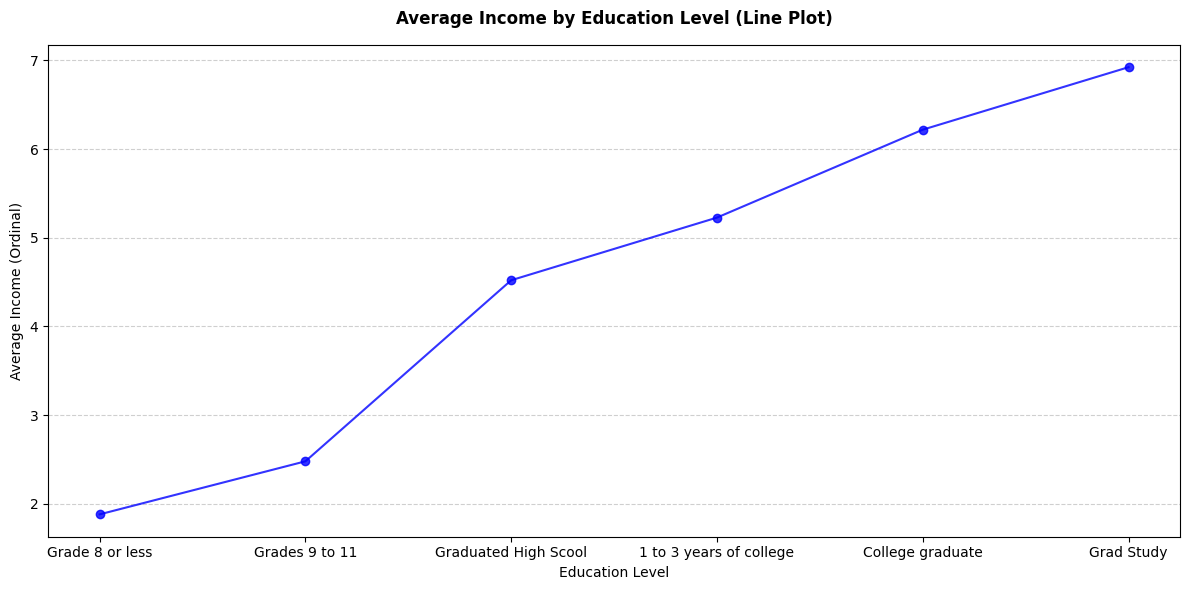

In [ ]:
# Income vs Education Level

# Data
education_income = df.groupby('EDUCATION')['INCOME_ORDINAL'].mean()
education_income = education_income.sort_values()

# Plot
plt.figure(figsize=[12, 6])
plt.plot(education_income.index, education_income.values, marker='o', color='blue', linestyle='-', alpha=0.8)
plt.xlabel('Education Level')
plt.ylabel('Average Income (Ordinal)')
plt.title('Average Income by Education Level (Line Plot)', fontweight='bold', pad=15)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

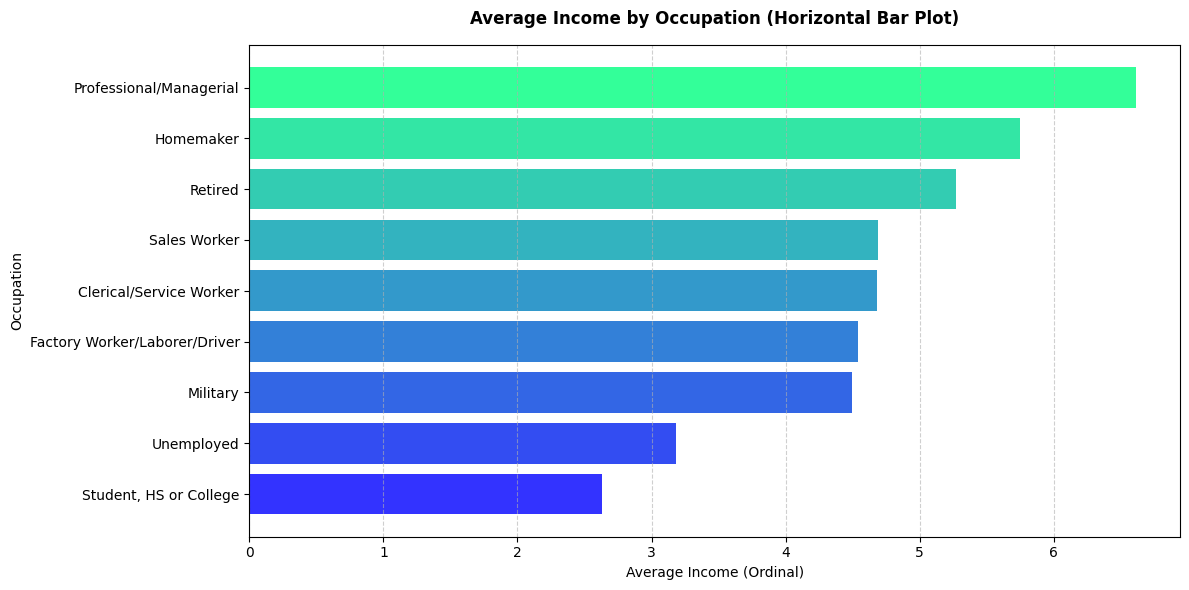

In [ ]:
# Income vs Occupation

# Data
occupation_income_mean = df.groupby('OCCUPATION')['INCOME_ORDINAL'].mean().sort_values()

# Color
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1, len(occupation_income_mean)))

# Plot
plt.figure(figsize=[12, 6])
plt.barh(occupation_income_mean.index, occupation_income_mean.values, color=colors, alpha=0.8)
plt.xlabel('Average Income (Ordinal)')
plt.ylabel('Occupation')
plt.title('Average Income by Occupation (Horizontal Bar Plot)', fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

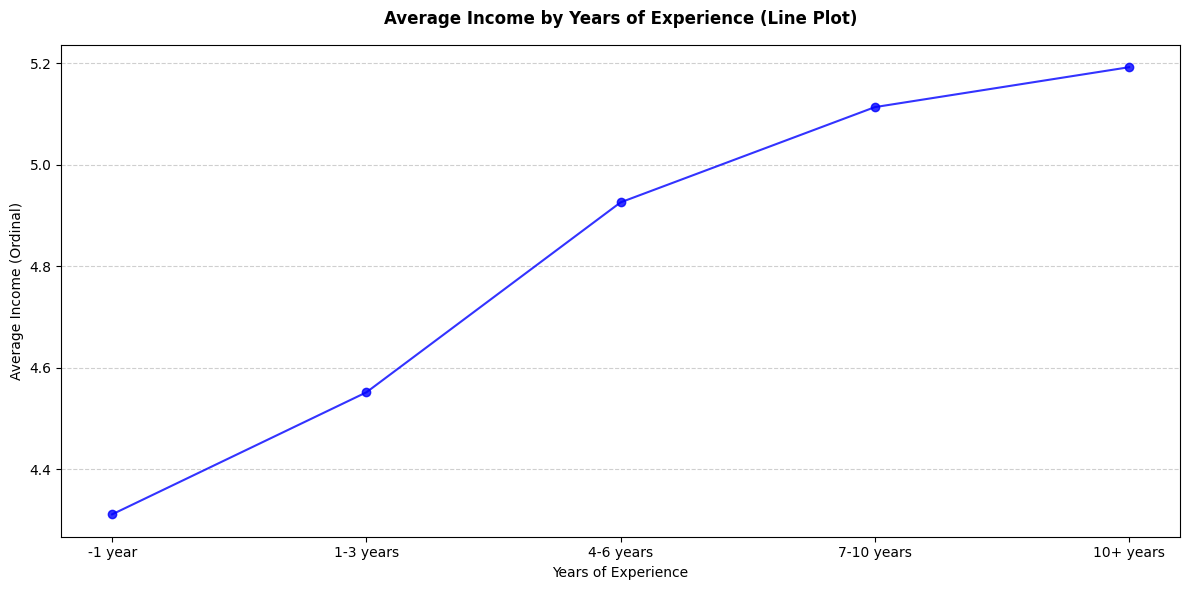

In [ ]:
# Income vs Years of Experience

# Data
areayear_income = df.groupby('AREA')['INCOME_ORDINAL'].mean()
areayear_income = areayear_income.sort_values()

# Plot
plt.figure(figsize=[12, 6])
plt.plot(areayear_income.index, areayear_income.values, marker='o', color='blue', linestyle='-', alpha=0.8)
plt.xlabel('Years of Experience')
plt.ylabel('Average Income (Ordinal)')
plt.title('Average Income by Years of Experience (Line Plot)', fontweight='bold', pad=15)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-56-868211f9c402>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DUAL.INCOMES', y='INCOME_ORDINAL', palette=palette, order=dualincomes_order, width=0.3, showmeans=True)


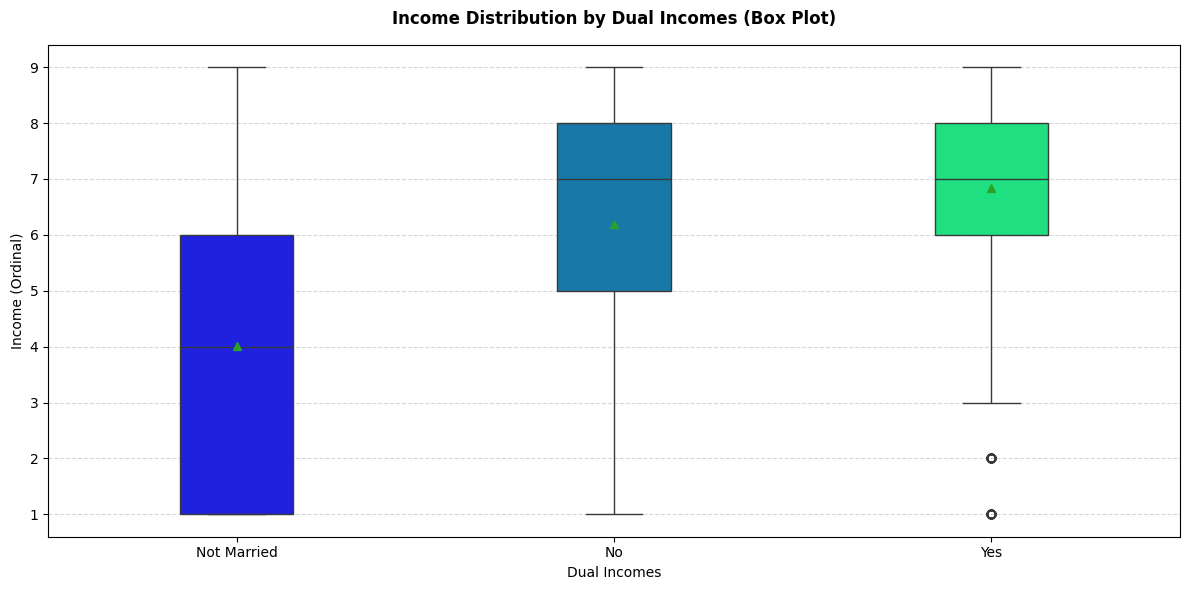

In [ ]:
# Income vs Dual Incomes

# Data
dualincomes_order = df.groupby('DUAL.INCOMES')['INCOME_ORDINAL'].mean().sort_values().index

# Color
cmap = plt.get_cmap('winter')
dualincomes = df['DUAL.INCOMES'].unique()
colors = cmap(np.linspace(0, 1, len(dualincomes)))
palette = dict(zip(dualincomes_order, colors))

# Plot
plt.figure(figsize=[12, 6])
sns.boxplot(data=df, x='DUAL.INCOMES', y='INCOME_ORDINAL', palette=palette, order=dualincomes_order, width=0.3, showmeans=True)
plt.xlabel('Dual Incomes')
plt.ylabel('Income (Ordinal)')
plt.title('Income Distribution by Dual Incomes (Box Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-57-792e18f6e8a4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HOME.TYPE', y='INCOME_ORDINAL', palette=palette, order=hometype_order, width=0.5, showmeans=True)


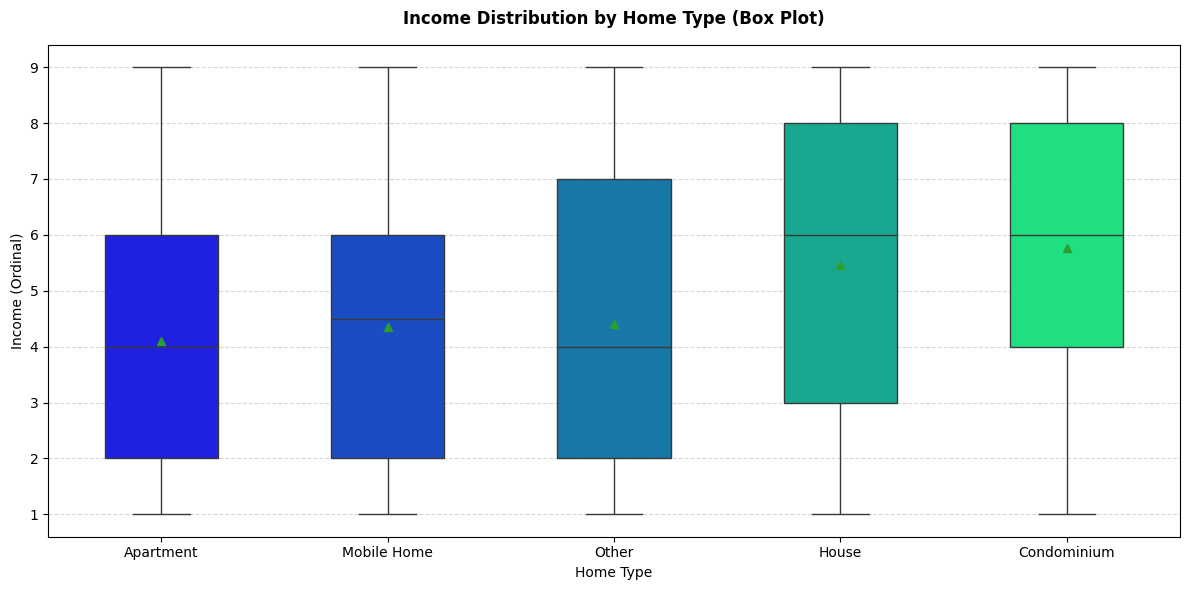

In [ ]:
# Income vs Home Type

# Data
hometype_order = df.groupby('HOME.TYPE')['INCOME_ORDINAL'].mean().sort_values().index

# Color
cmap = plt.get_cmap('winter')
hometypes = df['HOME.TYPE'].unique()
colors = cmap(np.linspace(0, 1, len(hometypes)))
palette = dict(zip(hometype_order, colors))

# Plot
plt.figure(figsize=[12, 6])
sns.boxplot(data=df, x='HOME.TYPE', y='INCOME_ORDINAL', palette=palette, order=hometype_order, width=0.5, showmeans=True)
plt.xlabel('Home Type')
plt.ylabel('Income (Ordinal)')
plt.title('Income Distribution by Home Type (Box Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-58-4d90b7a6da61>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='HOUSEHOLDER', y='INCOME_ORDINAL', palette=palette, order=householder_order, alpha=0.8)


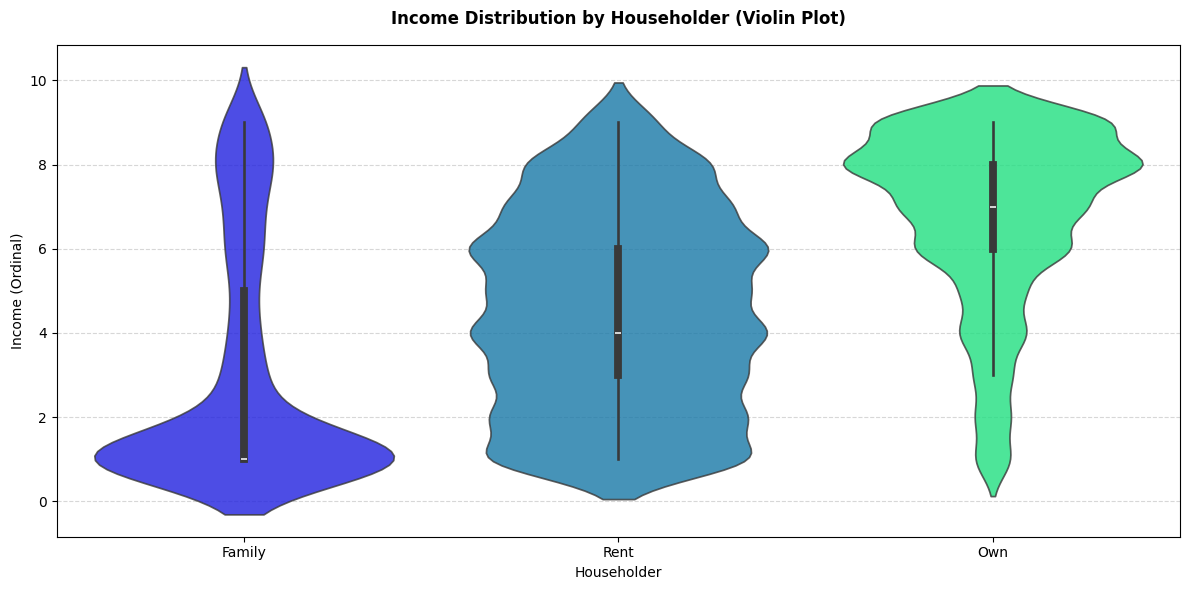

In [ ]:
# Income vs Householder

# Data
householder_order = df.groupby('HOUSEHOLDER')['INCOME_ORDINAL'].mean().sort_values().index

# Color
cmap = plt.get_cmap('winter')
householder = df['HOUSEHOLDER'].unique()
colors = cmap(np.linspace(0, 1, len(householder)))
palette = dict(zip(householder_order, colors))

# Plot
plt.figure(figsize=[12, 6])
sns.violinplot(data=df, x='HOUSEHOLDER', y='INCOME_ORDINAL', palette=palette, order=householder_order, alpha=0.8)
plt.xlabel('Householder')
plt.ylabel('Income (Ordinal)')
plt.title('Income Distribution by Householder (Violin Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

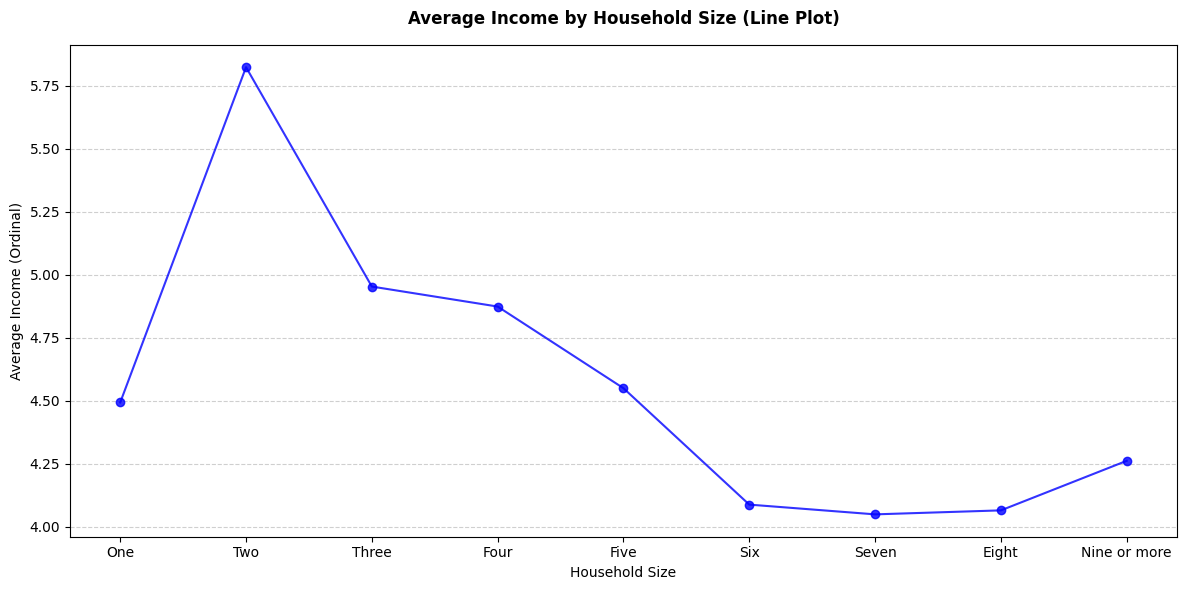

In [ ]:
# Income vs Household Size

# Data
householdsize_income = df.groupby('HOUSEHOLD.SIZE')['INCOME_ORDINAL'].mean().sort_values()
household_size_order = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine or more']
householdsize_income = householdsize_income.reindex(household_size_order)

# Color
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1, len(householdsize_income)))

# Plot
plt.figure(figsize=[12, 6])
plt.plot(householdsize_income.index, householdsize_income.values, marker='o', color='blue', linestyle='-', alpha=0.8)
plt.xlabel('Household Size')
plt.ylabel('Average Income (Ordinal)')
plt.title('Average Income by Household Size (Line Plot)', fontweight='bold', pad=15)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

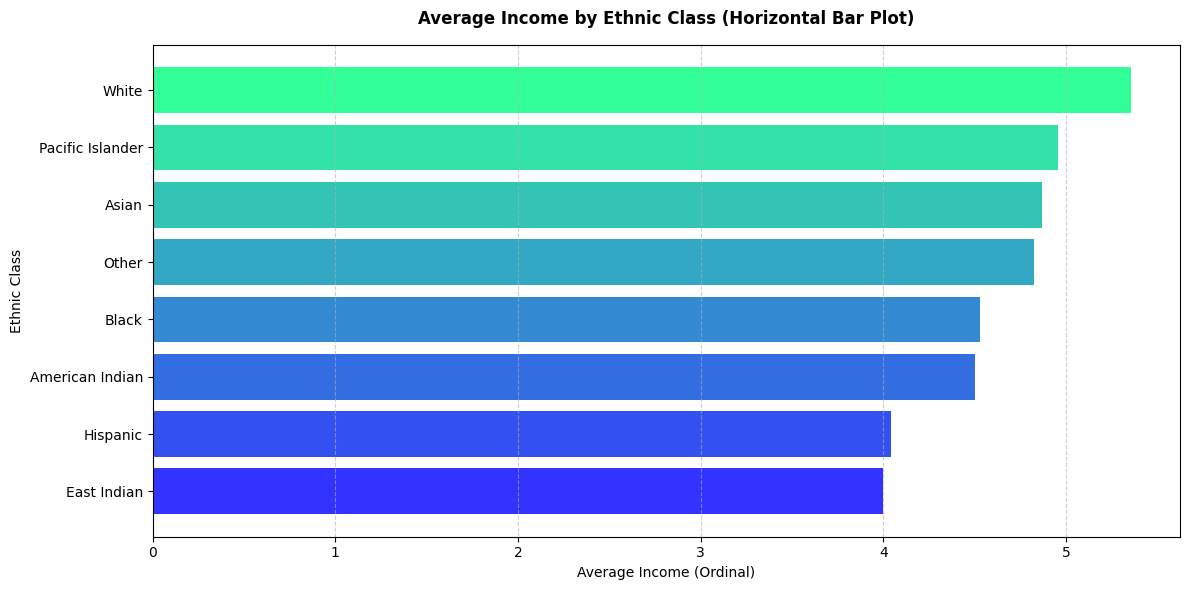

In [ ]:
# Income vs Ethnic Class

# Data
ethnic_income_mean = df.groupby('ETHNIC.CLASS')['INCOME_ORDINAL'].mean().sort_values()

# Color
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1, len(ethnic_income_mean)))

# Plot
plt.figure(figsize=[12, 6])
plt.barh(ethnic_income_mean.index, ethnic_income_mean.values, color=colors, alpha=0.8)
plt.xlabel('Average Income (Ordinal)')
plt.ylabel('Ethnic Class')
plt.title('Average Income by Ethnic Class (Horizontal Bar Plot)', fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


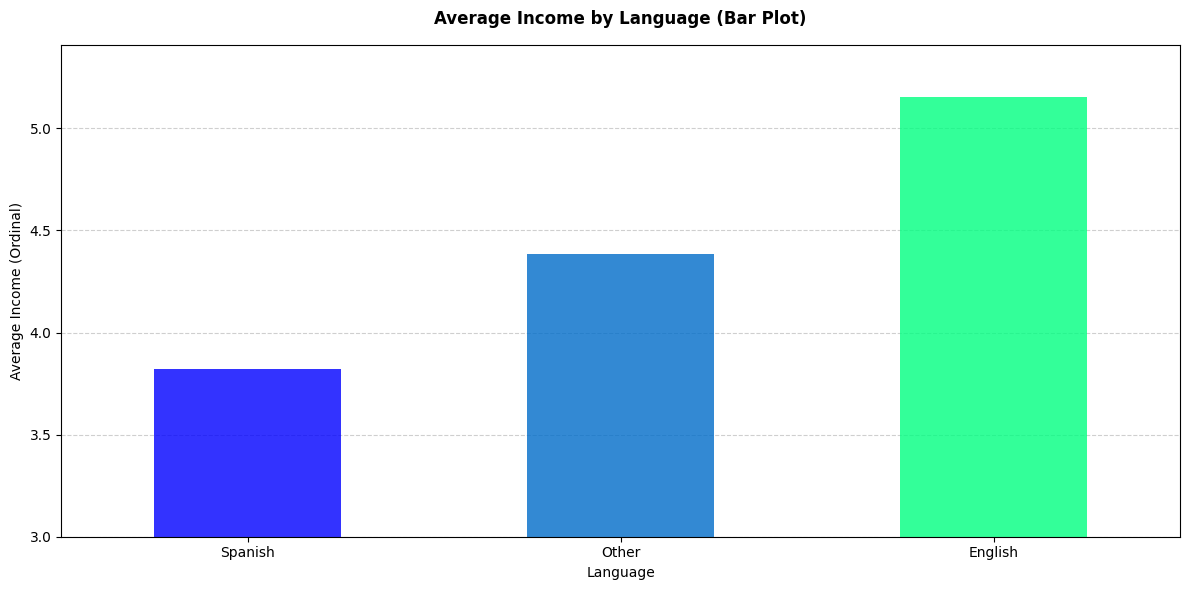

In [ ]:
# Income vs Language

# Data
language_income = df.groupby('LANGUAGE')['INCOME_ORDINAL'].mean()
language_income = language_income.sort_values()

# Colors
cmap = plt.get_cmap('winter')
norm = plt.Normalize(vmin=language_income.min(), vmax=language_income.max())
colors = cmap(norm(language_income))

# Plot
plt.figure(figsize=[12, 6])
language_income.plot(kind='bar', color=colors, alpha=0.8)
plt.xlabel('Language')
plt.ylabel('Average Income (Ordinal)')
plt.title('Average Income by Language (Bar Plot)', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.ylim(bottom=3)
plt.tight_layout()
plt.gca().set_axisbelow(True)
plt.show()

PREDICTIVE

In [ ]:
# Ordinal Encoder

def Ordinal (df, mapper, columns):
  temp_mapper = mapper
  df_temp = df_rIndex[[columns]].copy()
  df_temp[columns+"Scale"] = df_temp[columns].replace(temp_mapper)
  return df_temp

income_mapper = {'-10.000)': 1, '[10.000-15.000)': 2, '[15.000-20.000)': 3, '[20.000-25.000)': 4, '[25.000-30.000)': 5,
                 '[30.000-40.000)': 6, '[40.000-50.000)': 7, '[50.000-75.000)': 8, '[75.000-': 9}
df_income = Ordinal(df_rIndex, income_mapper, 'INCOME')
df_income = df_income.drop(columns = ['INCOME'])

age_mapper = {'14-17': 1, '18-24': 2, '25-34': 3, '35-44': 4, '45-54': 5, '55-64': 6, '65+': 7}
df_age = Ordinal(df_rIndex, age_mapper,'AGE')
df_age = df_age.drop(columns = ['AGE'])

edu_mapper = {'Grade 8 or less': 1, 'Grades 9 to 11': 2, 'Graduated High Scool': 3, '1 to 3 years of college': 4, 'College graduate': 5, 'Grad Study': 6}
df_edu = Ordinal(df_rIndex, edu_mapper, 'EDUCATION')
df_edu = df_edu.drop(columns = ['EDUCATION'])

area_mapper = {'-1 year': 1, '1-3 years': 2, '4-6 years': 3, '7-10 years': 4, '10+ years': 5}
df_area = Ordinal(df_rIndex, area_mapper, 'AREA')
df_area = df_area.drop(columns = ['AREA'])

hhSize_mapper = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5, 'Six': 6, 'Seven': 7, 'Eight': 8, 'Nine or more': 9}
df_hhSize = Ordinal(df_rIndex, hhSize_mapper, 'HOUSEHOLD.SIZE')
df_hhSize = df_hhSize.drop(columns = ['HOUSEHOLD.SIZE'])

df_temp = pd.concat([df_income, df_age, df_edu, df_area,], axis=1)
df_temp

<ipython-input-66-a53584d96f43>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp[columns+"Scale"] = df_temp[columns].replace(temp_mapper)
<ipython-input-66-a53584d96f43>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp[columns+"Scale"] = df_temp[columns].replace(temp_mapper)
<ipython-input-66-a53584d96f43>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

,INCOMEScale,AGEScale,EDUCATIONScale,AREAScale
0,9,5,5,5
1,9,3,5,5
2,1,1,2,5
3,1,1,2,3
4,8,6,4,5
...,...,...,...,...
6871,1,1,1,5
6872,2,2,4,5
6873,1,1,2,5
6874,4,6,4,5


In [ ]:
# OneHot Encoder
cat_encoder = OneHotEncoder()
df_oneHot = cat_encoder.fit_transform(df_rIndex[['SEX', 'MARITAL.STATUS', 'OCCUPATION','DUAL.INCOMES', 'HOUSEHOLDER', 'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE']])
df_oneHot = pd.DataFrame(df_oneHot.toarray(), columns = cat_encoder.get_feature_names_out(['SEX', 'MARITAL.STATUS', 'OCCUPATION',
                                                                                           'DUAL.INCOMES', 'HOUSEHOLDER', 'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE']))

df_oneHot

,SEX_F,SEX_M,MARITAL.STATUS_Divorced,MARITAL.STATUS_Married,MARITAL.STATUS_Single,MARITAL.STATUS_Together,MARITAL.STATUS_Widowed,OCCUPATION_Clerical/Service Worker,OCCUPATION_Factory Worker/Laborer/Driver,OCCUPATION_Homemaker,...,ETHNIC.CLASS_Asian,ETHNIC.CLASS_Black,ETHNIC.CLASS_East Indian,ETHNIC.CLASS_Hispanic,ETHNIC.CLASS_Other,ETHNIC.CLASS_Pacific Islander,ETHNIC.CLASS_White,LANGUAGE_English,LANGUAGE_Other,LANGUAGE_Spanish
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6872,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6873,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6874,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Merge
print(len(df_rIndex))

df_merge = pd.concat([df_rIndex, df_income, df_age, df_edu, df_area, df_hhSize, df_oneHot], axis=1)

df_clean_merge = df_merge.drop(columns = ['INCOME', 'SEX', 'MARITAL.STATUS', 'AGE', 'EDUCATION', 'OCCUPATION', 'AREA',
                                          'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'HOUSEHOLDER', 'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE'])

print(len(df_merge))
print(len(df_clean_merge))


6876
6876
6876


In [ ]:
# Data Spliting

df_train, df_val_test = train_test_split(df_clean_merge, test_size=0.4, random_state=99)
df_val, df_test = train_test_split(df_val_test, test_size=0.5, random_state=99)

x_train = df_train.drop('INCOMEScale', axis=1).copy()
y_train = df_train['INCOMEScale'].copy()
x_val = df_val.drop('INCOMEScale', axis=1).copy()
y_val = df_val['INCOMEScale'].copy()
x_test = df_test.drop('INCOMEScale', axis=1).copy()
y_test = df_test['INCOMEScale'].copy()

In [ ]:
df_clean_merge.head()

,INCOMEScale,AGEScale,EDUCATIONScale,AREAScale,HOUSEHOLD.SIZEScale,SEX_F,SEX_M,MARITAL.STATUS_Divorced,MARITAL.STATUS_Married,MARITAL.STATUS_Single,...,ETHNIC.CLASS_Asian,ETHNIC.CLASS_Black,ETHNIC.CLASS_East Indian,ETHNIC.CLASS_Hispanic,ETHNIC.CLASS_Other,ETHNIC.CLASS_Pacific Islander,ETHNIC.CLASS_White,LANGUAGE_English,LANGUAGE_Other,LANGUAGE_Spanish
0,9,5,5,5,5,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,9,3,5,5,3,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1,2,5,4,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,2,3,4,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8,6,4,5,2,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Predictive (Sebelum K-Fold)

randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)
score = randomForest.score(x_train,y_train)
print("Training Accuracy: ",score)
score = randomForest.score(x_val,y_val)
print("Validation Accuracy: ",score)

Training Accuracy:  0.9086060606060606
Validation Accuracy:  0.3141818181818182


In [ ]:
# Grid search

parameter = {'min_samples_leaf': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [100, 200, 300, 400, 500]}
gridSearch = GridSearchCV(estimator = randomForest, param_grid = parameter)
gridSearch.fit(x_train, y_train)
gridSearch.best_params_

KeyboardInterrupt: 

In [ ]:
# K-fold cross validation

randomForest = RandomForestClassifier(min_samples_leaf = 6, min_samples_split = 2, n_estimators = 100)
score = cross_val_score(randomForest, x_train, y_train, cv=10, scoring='accuracy')
print("Score Each Fold: ", score)
print("Mean Accuracy: ", score.mean())

randomForest.fit(x_train, y_train)
y_pred = randomForest.predict(x_val)
score = randomForest.score(x_train,y_train)
print("Training Accuracy: ",score)
score = randomForest.score(x_val,y_val)
print("Validation Accuracy: ",score)

Score Each Fold:  [0.3559322  0.33898305 0.34866828 0.3559322  0.36561743 0.36165049
 0.34951456 0.36650485 0.34951456 0.37621359]
Mean Accuracy:  0.356853123016526
Training Accuracy:  0.5241212121212121
Validation Accuracy:  0.3338181818181818


Recall: 0.26464009986283926
Precision: 0.2504519832743195
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.82      0.65       246
           2       0.12      0.09      0.10       105
           3       0.12      0.08      0.09        90
           4       0.23      0.23      0.23       137
           5       0.04      0.02      0.03       108
           6       0.23      0.21      0.22       168
           7       0.24      0.14      0.17       155
           8       0.32      0.45      0.37       223
           9       0.43      0.35      0.38       143

    accuracy                           0.33      1375
   macro avg       0.25      0.26      0.25      1375
weighted avg       0.29      0.33      0.30      1375



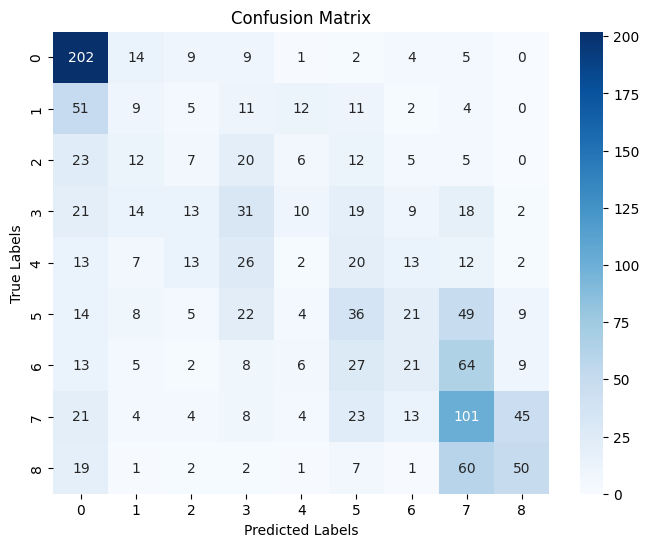

In [ ]:
# Confusion Matrix

recall = recall_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
print("Recall:", recall)
print("Precision:", precision)
print("Classification Report:")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#Prediction test

print("Prediction Test")

print("=================")
print("Age Category:")
print(" 1. 14-17\n 2. 18-24\n 3. 25-34\n 4. 35-44\n 5. 45-54\n 6. 55-64\n 7. 65+")
age = int(input("Input the number of the age category: "))

print("\n=================")
print("Education Category:")
print(" 1. Grade 8 or less\n 2. Grades 9 to 11\n 3. Graduated High Scool\n 4. 1 to 3 years of college\n 5. College graduate\n 6. Grad Study")
edu = int(input("Input the number of the education category: "))

print("\n=================")
print("Years of Experience Category:")
print(" 1. -1 year\n 2. 1-3 years\n 3. 4-6 years\n 4. 7-10 years\n 5. 10+ years")
area = int(input("Input the number of the years of experience category: "))

print("\n=================")
print("Household Size Category:")
print(" 1. One\n 2. Two\n 3. Three\n 4. Four\n 5. Five\n 6. Six\n 7. Seven\n 8. Eight\n 9. Nine or more")
hhSize = int(input("Input the number of the household size category: "))

print("\n=================")
print("Gender Category:")
print(" 1. Female\n 2. Male")
sex = int(input("Input the number of the sex category: "))
if sex == 1:
  sex = [1.0, 0.0]
elif sex == 2:
  sex = [0.0, 1.0]

print("\n=================")
print("Marital Status Category:")
print(" 1. Divorced\n 2. Married\n 3. Single\n 4. Together\n 5. Widowed")
mStat = int(input("Input the number of the marital status category: "))
if mStat == 1:
  mStat = [1.0, 0.0, 0.0, 0.0, 0.0]
elif mStat == 2:
  mStat = [0.0, 1.0, 0.0, 0.0, 0.0]
elif mStat == 3:
  mStat = [0.0, 0.0, 1.0, 0.0, 0.0]
elif mStat == 4:
  mStat = [0.0, 0.0, 0.0, 1.0, 0.0]
elif mStat == 5:
  mStat = [0.0, 0.0, 0.0, 0.0, 1.0]

print("\n=================")
print("Occupation Category:")
print(" 1. Clerical/Service Worker\n 2. Factory Worker/Laborer/Driver\n 3. Homemaker\n 4. Military\n 5. Professional/Managerial\n 6. Retired\n 7. Sales Worker\n 8. Student, HS or College\n 9. Unemployed")
occup = int(input("Input the number of the occupation category: "))
if occup == 1:
  occup = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif occup == 2:
  occup = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif occup == 3:
  occup = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif occup == 4:
  occup = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif occup == 5:
  occup = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
elif occup == 6:
  occup = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
elif occup == 7:
  occup = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
elif occup == 8:
  occup = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
elif occup == 9:
  occup = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

print("\n=================")
print("Dual Income Category:")
print(" 1. No\n 2. Not Married\n 3. Yes")
income = int(input("Input the number of the dual income category: "))
if income == 1:
  income = [1.0, 0.0, 0.0]
elif income == 2:
  income = [0.0, 1.0, 0.0]
elif income == 3:
  income = [0.0, 0.0, 1.0]

print("\n=================")
print("Householder Category:")
print(" 1. Family\n 2. Own\n 3. Rent")
holder = int(input("Input the number of the householder category: "))
if holder == 1:
  holder = [1.0, 0.0, 0.0]
elif holder == 2:
  holder = [0.0, 1.0, 0.0]
elif holder == 3:
  holder = [0.0, 0.0, 1.0]

print("\n=================")
print("Home Type Category:")
print(" 1. Apartment\n 2. Condominium\n 3. House\n 4. Mobile Home\n 5. Other")
hType = int(input("Input the number of the home type category: "))
if hType == 1:
  hType = [1.0, 0.0, 0.0, 0.0, 0.0]
elif hType == 2:
  hType = [0.0, 1.0, 0.0, 0.0, 0.0]
elif hType == 3:
  hType = [0.0, 0.0, 1.0, 0.0, 0.0]
elif hType == 4:
  hType = [0.0, 0.0, 0.0, 1.0, 0.0]
elif hType == 5:
  hType = [0.0, 0.0, 0.0, 0.0, 1.0]

print("\n=================")
print("Ethnic Category:")
print(" 1. American Indian\n 2. Asian\n 3. Black\n 4. East Indian\n 5. Hispanic\n 6. Other\n 7. Pacific Islander\n 8. White")
ethnic = int(input("Input the number of the ethnic category: "))
if ethnic == 1:
  ethnic = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif ethnic == 2:
  ethnic = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif ethnic == 3:
  ethnic = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
elif ethnic == 4:
  ethnic = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
elif ethnic == 5:
  ethnic = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
elif ethnic == 6:
  ethnic = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
elif ethnic == 7:
  ethnic = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
elif ethnic == 8:
  ethnic = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

print("\n=================")
print("Language Category:")
print(" 1. English\n 2. Other\n 3. Spanish")
lang = int(input("Input the number of the language category: "))
if lang == 1:
  lang = [1.0, 0.0, 0.0]
elif lang == 2:
  lang = [0.0, 1.0, 0.0]
elif lang == 3:
  lang = [0.0, 0.0, 1.0]


predict_data = [age, edu, area, hhSize] + sex + mStat + occup + income + holder + hType + ethnic + lang
predict_merge = pd.concat([pd.DataFrame([predict_data])], axis=1)

idx = randomForest.predict(predict_merge).round()
for key, value in income_mapper.items():
  if value == idx:
    print("Income prediction: "+ key)

Prediction Test
Age Category:
 1. 14-17
 2. 18-24
 3. 25-34
 4. 35-44
 5. 45-54
 6. 55-64
 7. 65+


KeyboardInterrupt: Interrupted by user

<Axes: >

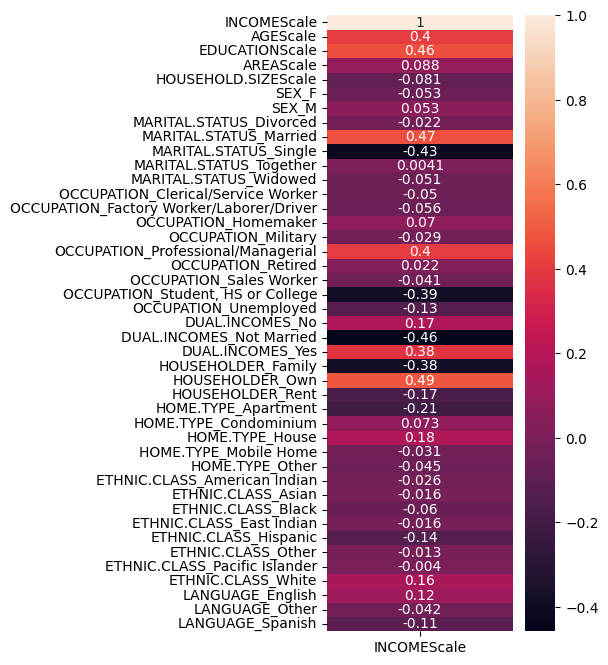

In [ ]:
# Correlation Heatmap

plt.figure(figsize=[3,8])
sns.heatmap(df_clean_merge.corr()[['INCOMEScale']], annot=True)